In [1]:
from IPython.display import display, HTML
from pathlib import Path
import pandas as pd
import numpy as np
import re

In [2]:
DATA_PATH =  '../data'
VAL_DATA_PATH = 'validation_data.csv'
COMMENTS_TO_SCORE_PATH = 'comments_to_score.csv'
SAMPLE_PATH = 'sample_submission.csv'
DATA_PATH = Path(DATA_PATH)
VAL_DATA_PATH = DATA_PATH/VAL_DATA_PATH
COMMENTS_TO_SCORE_PATH = DATA_PATH/COMMENTS_TO_SCORE_PATH
SAMPLE_PATH = DATA_PATH/SAMPLE_PATH

In [3]:
VAL_DATA = pd.read_csv(VAL_DATA_PATH)
COMMENTS_TO_SCORE = pd.read_csv(COMMENTS_TO_SCORE_PATH)
SAMPLE = pd.read_csv(SAMPLE_PATH)

FileNotFoundError: [Errno 2] No such file or directory: '../data/validation_data.csv'

In [328]:
VAL_DATA.drop_duplicates(subset = ['less_toxic', 'more_toxic'], inplace = True)

In [329]:
print('number of workers', VAL_DATA.worker.nunique())

number of workers 671


average length of `less toxic`


<AxesSubplot:>

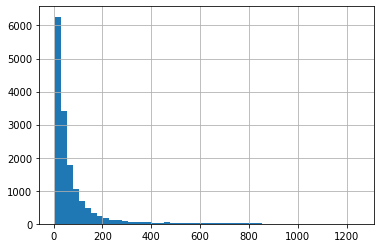

In [330]:
print('average length of `less toxic`')
VAL_DATA['less_toxic'].apply(lambda x: len(x.split(' '))).hist(bins = 50)

average length of `more toxic`


<AxesSubplot:>

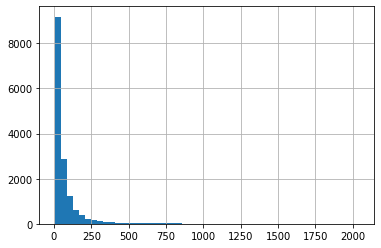

In [331]:
print('average length of `more toxic`')
VAL_DATA['more_toxic'].apply(lambda x: len(x.split(' '))).hist(bins = 50)

In [332]:
print('more toxic n unique:', VAL_DATA['more_toxic'].nunique())
print('less toxic n unique:', VAL_DATA['less_toxic'].nunique())

more toxic n unique: 11678
less toxic n unique: 11532


In [242]:
def clean_text(text):
    text = re.sub('[\t\n]', ' ', text)
    text = re.sub('[ ]+', ' ', text)
    text = re.sub('\xa0', ' ', text)
    text = re.sub('(&lt)', '', text)
    text = re.sub('(&gt)', '', text)
    text = text.strip()
    return text

In [185]:
VAL_DATA['less_toxic'].apply(lambda x: clean_text(x))

0                      This article sucks woo woo wooooooo
1        "And yes, people should recognize that but the...
2        Western Media? Yup, because every crime in the...
3        And you removed it! You numbskull! I don't car...
4        smelly vagina Bluerasberry why don't you be a ...
                               ...                        
30097    Straw poll being conducted on Catholic Church ...
30100    Outrageous!!!!! This block is outrageous and u...
30101    Blink 182 You ahve 3 Blink 182 CD's???? WOW I ...
30103    I'm sorry. I'm not an admin. I will give you t...
30105    wow... are you out of your mind, how was my ed...
Name: less_toxic, Length: 15410, dtype: object

In [366]:
gp1 = VAL_DATA.groupby(['less_toxic','more_toxic']).worker.count().reset_index()
gp2=gp1.copy()
gp2['less_toxic']=gp1['more_toxic']
gp2['more_toxic']=gp1['less_toxic']
mrg=gp1.merge(gp2,how='outer',on=['less_toxic','more_toxic']).fillna(0)
mrg['sum']=mrg.worker_x+mrg.worker_y
mrg['max']=mrg[['worker_x','worker_y']].max(1)
mrg['max'].sum()/mrg['sum'].sum()

0.6559377027903959

In [16]:
hash(' '.join(list(train_df['text'].values)))

1590756495830463358

In [10]:
val_df = pd.read_csv('../data/jigsaw-rate-severity/validation_data.csv')

In [21]:
hash(' '.join(list(val_df['less_toxic'])) + 'tfidf')

462245294739068386

In [14]:
hash(' '.join(list(val_df['more_toxic'].values)))

2433282977202673898